<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set 1 (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Hepatitis:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country





## Table of Content

1. **[Bivariate Regression](#Bivariate)**
2. **[Multiple Linear Regression (MLR)](#MLR)**
3. **[Inferences about slope](#ins)**
4. **[Model Evaluation](#ML_eval)**
5. **[Assumptions of Linear Regression](#assum)**
6. **[Model Performance](#ml_perf)**

**Import the required libraries**

In [1]:
# type your code here# type your code here

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

#### Load the first dataset and check the first five observations

Load the csv file and set the first column as index

In [2]:

# load the csv file
life = pd.read_csv("Life_Expectancy.csv")
# type your code here

### Let's begin with some hands-on practice exercises

<a id="Bivariate"> </a>
## 1. Bivariate Regression

## We shall use the life expectancy dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. How do we analyze the impact of adult mortality rate on average life expectancy of a country?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

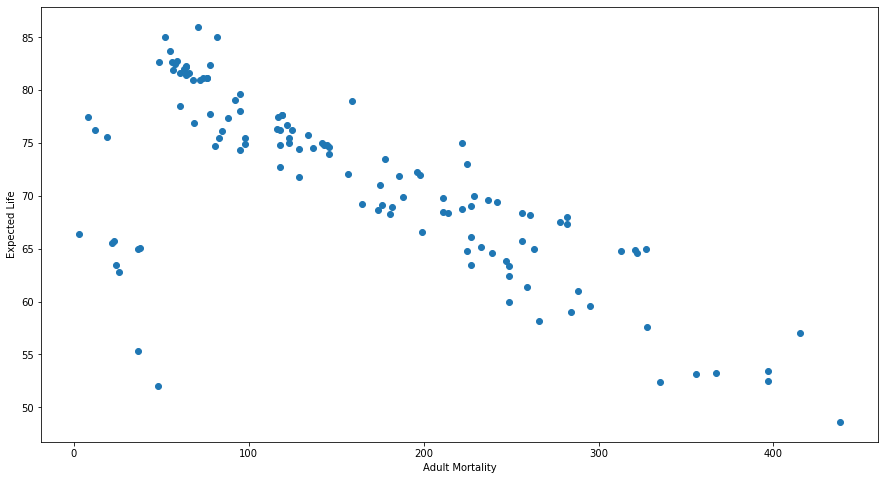

In [3]:
# type your code here
plt.scatter(life.Adult_Mortality, life.Expected)
plt.xlabel("Adult Mortality")
plt.ylabel("Expected Life")
plt.show()

In [4]:
life.loc[:, ["Adult_Mortality", "Expected"]].corr() # -ve correl

,Adult_Mortality,Expected
Adult_Mortality,1.000000,-0.710868
Expected,-0.710868,1.000000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. A regression model is built to check the impact of Human Development Index (Income) on the life expectancy of a nation. What is the expected error value?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
# type your code here
lr = LinearRegression()

x = pd.DataFrame(life.Income_Index)
y = pd.DataFrame(life.Expected)
pred_lr = lr.fit(x, y).predict(x)
residuals = np.array(life.Expected) - pred_lr
print("Sum of Residuals: ", np.sum(residuals))
from statsmodels.formula.api import ols

model = ols("Expected~Income_Index", data = life).fit()
model.summary()

Sum of Residuals:  -2.0554580260068178e-10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        21:34:18   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="MLR"> </a>
## 2. Multiple Linear Regression(MLR)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Analyze the impact of immunization on life expectancy. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# type your code here
import statsmodels.api as sm
from statsmodels.api import OLS

mydata = life.iloc[:,[4, 8, 9,17]]
mydata.columns

x = mydata.drop("Expected", axis = 1)
x = sm.add_constant(x) # 1 as constant it facilitates the calc of Intercept...
y = mydata.Expected

model = OLS(y, x).fit() # ytrain, xtrain
print(model.summary())
# In this model you wanna generate the list of all the predictors which have value > 0.05
# Insignificant Variables...
insig_feat = model.pvalues[1:][model.pvalues[1:]>0.05].index

                            OLS Regression Results                            
Dep. Variable:               Expected   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     6.395
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           0.000468
Time:                        21:34:19   Log-Likelihood:                -431.15
No. Observations:                 124   AIC:                             870.3
Df Residuals:                     120   BIC:                             881.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9881      3.524     16.453      

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. If the information that whether the country is a developed or a developing country is included, does it alter the impact of immunzation on life expectancy ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
# type your code here
# pd.get_dummies and drop_first = True
mydata = life.iloc[:,[1,4, 8, 9,17]]
mydata.head()

,Status,Hepatitis,Polio,Diphtheria,Expected
0,Developing,65,6,65,65.0
1,Developing,98,98,98,77.5
2,Developing,95,95,95,75.6
3,Developing,64,7,64,52.4
4,Developing,94,93,94,76.3


In [8]:
encode = pd.get_dummies(life.Status, drop_first=True, prefix="Status")
newx = pd.concat([pd.DataFrame(x), encode], axis = 1)
newmodel = OLS(y, newx).fit()
newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     14.06
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.00e-09
Time:                        21:34:19   Log-Likelihood:                -416.35
No. Observations:                 124   AIC:                             842.7
Df Residuals:                     119   BIC:                             856.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.8090      3.771     18.512      0.000      62.342      77.276
Hepatitis            -0.0035      0.063     -0.056      0.955      -0.128       0.121
Polio                 0.0771      0.039      1.993      0.049       0.000       0.154
Diphtheria            0.0456      0.076      0.602      0.548      -0.104       0.196
Status_Developing   -10.6036      1.872     -5.664      0.000     -14.310      -6.897
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.635
Skew:                          -0.355   Prob(JB):                        0.268
Kurtosis:                       3.077   Cond. No.                         946.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Expectancy if the Status of Developing is 0
69.8090+(-10.6036)*0 # 70years

# If there is no immunity given and country is developed then the Life Expectancy is 70 years...
# No Immunity in Developing Countries ~ Life Expectancy is 59.20 years

69.809

<a id="ins"> </a>
## 3. Inferences about slope

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the significant variables in the full model when all the variables are considered for prediction of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here
# type your code here
# insig_feat = model.pvalues[1:][model.pvalues[1:]>0.05].index
newlife = pd.concat([life, encode], axis = 1)

newx = newlife.drop(["Country", "Status", "Expected"], axis = 1)
newx = sm.add_constant(newx)
newy = newlife.Expected

model = OLS(newy, newx).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.43
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.94e-36
Time:                        21:34:19   Log-Likelihood:                -323.38
No. Observations:                 124   AIC:                             680.8
Df Residuals:                     107   BIC:                             728.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 60.0678      3.747     16.030      0.000      52.639      67.496
Adult_Mortality       -0.0231      0.004     -5.685      0.000      -0.031      -0.015
Infant_Deaths          0.0556      0.037      1.507      0.135      -0.018       0.129
Hepatitis              0.0656      0.032      2.056      0.042       0.002       0.129
Measles             -5.93e-05   6.09e-05     -0.974      0.332      -0.000    6.14e-05
 BMI                  -0.0266      0.023     -1.179      0.241      -0.071       0.018
Underfive_Deaths      -0.0389      0.027     -1.439      0.153      -0.093       0.015
Polio                 -0.0091      0.022     -0.417      0.677      -0.053       0.034
Diphtheria            -0.0345      0.040     -0.868      0.387      -0.113       0.044
 HIV                  -1.0385      0.268     -3.881      0.000      -1.569      -0.508
GDP                 5.021e-05   3.48e-05      1.445      0.151   -1.87e-05       0.000
Population         -1.845e-08    8.6e-09     -2.146      0.034   -3.55e-08   -1.41e-09
Malnourished10_19     -0.4850      0.300     -1.616      0.109      -1.080       0.110
Malnourished5_9        0.2983      0.283      1.053      0.294      -0.263       0.860
Income_Index          18.6518      6.313      2.955      0.004       6.138      31.166
Schooling              0.3599      0.346      1.040      0.301      -0.326       1.046
Status_Developing     -2.0360      1.168     -1.743      0.084      -4.352       0.280
==============================================================================
Omnibus:                        6.529   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.038   Jarque-Bera (JB):               10.518
Skew:                           0.122   Prob(JB):                      0.00520
Kurtosis:                       4.406   Cond. No.                     9.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model.pvalues[1:][model.pvalues[1:]<0.05].index

Index(['Adult_Mortality', 'Hepatitis ', ' HIV', 'Population', 'Income_Index'], dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. If economic indices are used to predict the life expectancy, calculate the total variation for the observed values of life expectancy.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
# type your code here
predictors = newx.loc[:, ["GDP", "Income_Index"]]
predictors = sm.add_constant(predictors)
newy = newlife.Expected

model = OLS(newy, predictors).fit()

SSR = np.sum((model.predict(predictors)-newy.mean())**2)
print(SSR)

SST = np.sum((newy - newy.mean())**2)
print(SST)

SSE = SST - SSR
print(SSE)

6292.571603999805
8819.80548387097
2527.2338798711653


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Determine the lower bound and upper bound for estimated value of life expectancy per unit change in HDI (for income)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here
# type your code here
input_data = newx.loc[:, "Income_Index"]# Dep Var is newy
input_data = sm.add_constant(input_data)

newmodel = OLS(newy, input_data).fit()
newmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     300.0
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.13e-34
Time:                        21:34:19   Log-Likelihood:                -363.40
No. Observations:                 124   AIC:                             730.8
Df Residuals:                     122   BIC:                             736.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           41.9191      1.741     24.081      0.000      38.473      45.365
Income_Index    42.4243      2.449     17.322      0.000      37.576      47.273
==============================================================================
Omnibus:                       11.870   Durbin-Watson:                   1.355
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               26.475
Skew:                           0.280   Prob(JB):                     1.78e-06
Kurtosis:                       5.193   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Coefficients
print(newmodel.conf_int())

                      0          1
const         38.473158  45.365105
Income_Index  37.575806  47.272760


<a id="ML_eval"> </a>
## 4. Model Evaluation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. A model is built to analyze the impact of mortality on Life expectancy. Would the addition of information about population of the country lead to a better prediction?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
newx.columns #'Adult_Mortality', 'Infant_Deaths','Underfive_Deaths '
var_input = newx.loc[:, ['Adult_Mortality', 'Infant_Deaths','Underfive_Deaths ']]
var_input = sm.add_constant(var_input)

OLS(newy, var_input).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     45.18
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           1.29e-19
Time:                        21:34:19   Log-Likelihood:                -393.48
No. Observations:                 124   AIC:                             795.0
Df Residuals:                     120   BIC:                             806.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3623      1.004     80.060      0.000      78.375      82.350
Adult_Mortality      -0.0548      0.005     -9.996      0.000      -0.066      -0.044
Infant_Deaths         0.0905      0.049      1.844      0.068      -0.007       0.188
Underfive_Deaths     -0.0775      0.038     -2.033      0.044      -0.153      -0.002
==============================================================================
Omnibus:                       54.244   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.185
Skew:                          -1.734   Prob(JB):                     1.33e-31
Kurtosis:                       6.937   Cond. No.                         392.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
newx.columns #'Adult_Mortality', 'Infant_Deaths','Underfive_Deaths '
var_input = newx.loc[:, ['Adult_Mortality', 'Infant_Deaths','Underfive_Deaths ', "Population"]]
var_input = sm.add_constant(var_input)

OLS(newy, var_input).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     33.68
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           8.93e-19
Time:                        21:34:20   Log-Likelihood:                -393.41
No. Observations:                 124   AIC:                             796.8
Df Residuals:                     119   BIC:                             810.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.3071      1.019     78.813      0.000      78.289      82.325
Adult_Mortality      -0.0550      0.006     -9.929      0.000      -0.066      -0.044
Infant_Deaths         0.0886      0.050      1.788      0.076      -0.010       0.187
Underfive_Deaths     -0.0760      0.038     -1.975      0.051      -0.152       0.000
Population         4.736e-09   1.31e-08      0.361      0.718   -2.12e-08    3.07e-08
==============================================================================
Omnibus:                       54.418   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.042
Skew:                          -1.738   Prob(JB):                     8.69e-32
Kurtosis:                       6.949   Cond. No.                     8.72e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model and test the significance of the overall model. <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:

fullmodel = OLS(newy, newx).fit()

print(fullmodel.f_pvalue) # Since Pr(F)< 0.05 then model is found to significant# type your code here

1.943066855484724e-36


<a id="assum"> </a>
## 4. Assumptions of Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. A model is built using all the features (full model) to predict the life expectancy. Check whether the residuals obtained form the model follow a normal distribution.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
stats.shapiro(fullmodel.resid) # Data is not normal.

ShapiroResult(statistic=0.9769425392150879, pvalue=0.03209252282977104)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Does the interaction of status of the country and its GDP have significant effect on life expectancy? (consider the full model)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
print("Model without Interaction Effect: ", fullmodel.rsquared)
print("Model without Interaction Effect: ", fullmodel.rsquared_adj)
inteffect = newx["GDP"]*newx["Status_Developing"]
newx["effect"] = inteffect
OLS(newy, newx).fit().summary() # Interaction Effect is increasing the power of the model

Model without Interaction Effect:  0.8484171838775857
Model without Interaction Effect:  0.8257505945508695


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     36.30
Date:                Wed, 20 Jan 2021   Prob (F-statistic):           2.14e-36
Time:                        21:34:20   Log-Likelihood:                -321.30
No. Observations:                 124   AIC:                             678.6
Df Residuals:                     106   BIC:                             729.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.5466      3.925     15.935      0.000      54.765      70.328
Adult_Mortality       -0.0228      0.004     -5.680      0.000      -0.031      -0.015
Infant_Deaths          0.0564      0.036      1.547      0.125      -0.016       0.129
Hepatitis              0.0715      0.032      2.259      0.026       0.009       0.134
Measles            -5.287e-05   6.03e-05     -0.877      0.382      -0.000    6.66e-05
 BMI                  -0.0291      0.022     -1.306      0.194      -0.073       0.015
Underfive_Deaths      -0.0401      0.027     -1.497      0.137      -0.093       0.013
Polio                 -0.0056      0.022     -0.258      0.797      -0.049       0.037
Diphtheria            -0.0446      0.040     -1.124      0.264      -0.123       0.034
 HIV                  -1.0748      0.265     -4.054      0.000      -1.600      -0.549
GDP                -7.939e-06    4.6e-05     -0.173      0.863   -9.91e-05    8.32e-05
Population         -1.612e-08   8.58e-09     -1.878      0.063   -3.31e-08    8.96e-10
Malnourished10_19     -0.4757      0.297     -1.604      0.112      -1.064       0.112
Malnourished5_9        0.2995      0.280      1.071      0.287      -0.255       0.854
Income_Index          15.9884      6.392      2.501      0.014       3.315      28.662
Schooling              0.4188      0.343      1.220      0.225      -0.262       1.099
Status_Developing     -3.8250      1.489     -2.569      0.012      -6.777      -0.873
effect                 0.0001    6.8e-05      1.902      0.060    -5.5e-06       0.000
==============================================================================
Omnibus:                        4.411   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.490
Skew:                           0.109   Prob(JB):                       0.0642
Kurtosis:                       4.008   Cond. No.                     9.48e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.48e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Construct a full no-intecept model. What would you conclude when all the variables take value 0? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
newinput = newx.drop("const", axis = 1)

nointerceptmodel = OLS(newy, newinput).fit()

# If intercept is not there in regression model, then it means the line is passing from O(0,0).

<AxesSubplot:>

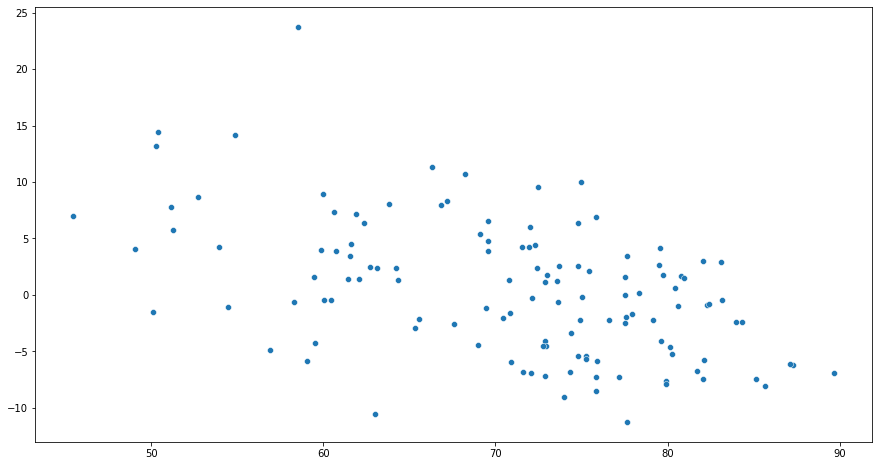

In [21]:
sns.scatterplot(nointerceptmodel.fittedvalues, nointerceptmodel.resid)

### Hereon on we shall consider the FEV dataset.


### About the data set (Respiratory function data)

Dataset consists of information about respiratory function in children and adolescents and factors that might impact the respiratory function. <br> Attribute information: 

**Age:** Age in years

**Height:** Height in inches 

**Gender:** Gender value is 1 if male 0 if female

**Smoke:** Whether the person is a smoker or non- smoker, the value is 1 if smoker and 0 otherwise

**FEV:**  Forced Exhalation Volume (FEV), a measure of how much air somebody can forcibly exhale from their lung (Percentage)

#### Load the dataset and check the first five observations

In [22]:
# load the csv file
df=pd.read_csv("LungCapdata.csv")
df.head()
# type your code here

,Age,Height,Gender,Smoke,FEV
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Can we use a linear regression model to analyze the impact of all the features on respiratory function (FEV) ? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
x = df.drop("FEV", axis = 1)
x = sm.add_constant(x) # 1 as constant it facilitates the calc of Intercept...
y = df.FEV
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 1)
model = OLS(y, x).fit() # ytrain, xtrain
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FEV   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     560.0
Date:                Wed, 20 Jan 2021   Prob (F-statistic):          9.10e-209
Time:                        21:34:20   Log-Likelihood:                -345.90
No. Observations:                 654   AIC:                             701.8
Df Residuals:                     649   BIC:                             724.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4570      0.223    -20.001      0.0

In [24]:
# Test for Linearlity
# H0 :: Data is linear
# H1 :: Data is not linear 
import statsmodels.api as sma
sma.stats.diagnostic.linear_rainbow(model) 
### Rule:  Pvalue > 0.05. Hence Fail to reject the H0. 

### Inference:  Data is Linear 
# Test for Multicollinearity
# Here, condition number is 861. It shows that there is moderate multicollinearity.

(0.97778686775542, 0.5802195276905335)

In [25]:
# Test for Heteroskedasticity

import statsmodels.stats.api as ssa

predictors = df.drop("FEV", axis =1 )

# residuals, predictors:: endog, exhog
# Generate 04 statistic - Test Stat of BP, PValue(BP), Ftest & Pvalue(Ftest)
teststats, pvalue, ftest, f_pvalue = ssa.het_breuschpagan(model.resid, 
                                                          predictors) 

print(pvalue)


1.4818413892717888e-41


### Inference

* pvalue < 0.05
* Reject the H0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. How can we rectify the multicollinearity detected in question 13? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

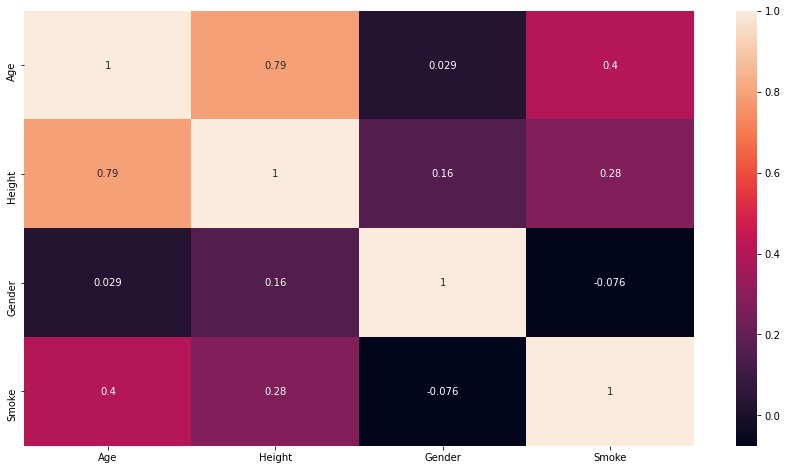

In [26]:
sns.heatmap(df.drop('FEV',axis=1).corr(),annot=True)
plt.show()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1=df.drop("Height",axis=1) # Here we are dropping Height column  
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = df1.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Age,2.307311
1,Gender,1.977845
2,Smoke,1.238003


To rectify we have dropped Height column which was having the highest multicollinearity, Hence Data was dependent.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). How do we check whether or not the model adequately captures the relationship between the response and predictor variables?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

X = df.drop("FEV", axis =1)
y = df.FEV

pred = lr.fit(X,y).predict(X)

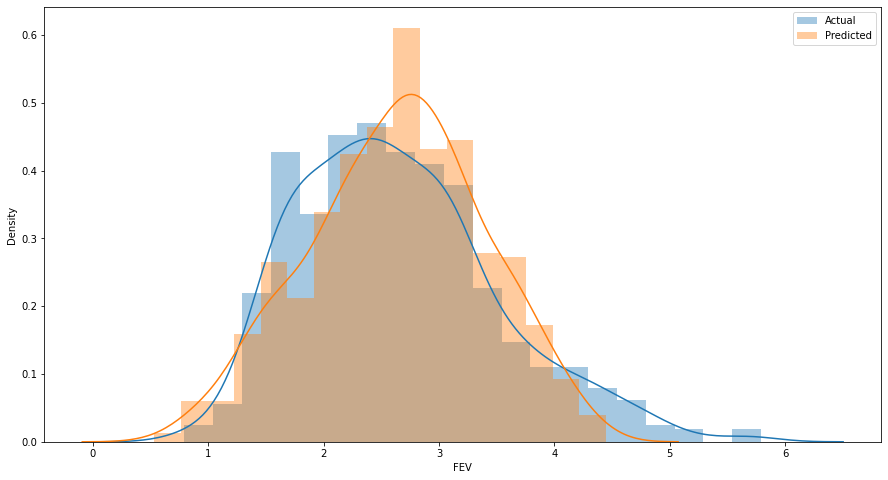

In [29]:
sns.distplot(df.FEV,label='Actual')
sns.distplot(pred,label='Predicted')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16.  A Linear regression model is used to analyze the impact of all possible features on respiratory function (FEV). Check whether the error terms are serially independent?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
fs = sfs(estimator=LinearRegression(), k_features="best", forward = True, 
         verbose = 2, scoring = "r2", cv = 14)

# fit the model and generate the feature names

X = df.drop(["FEV"], axis = 1)
y = df.FEV

sfsmodel = fs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s finished

[2021-01-20 21:34:22] Features: 1/4 -- score: 0.5456913727261887[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished

[2021-01-20 21:34:22] Features: 2/4 -- score: 0.5763200726530889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2021-01-20 21:34:22] Features: 3/4 -- score: 0.587514438595681[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [31]:
print("Features: ", sfsmodel.k_feature_names_)
print("R2 Score: ", sfsmodel.k_score_)

Features:  ('Age', 'Height', 'Gender')
R2 Score:  0.587514438595681


#### Interaction are the best variables for this data and Hence the error terms are serially independent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. A model is built using all the features to predict the FEV. Check whether the residuals obtained form the model are normally distributed. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:ylabel='Density'>

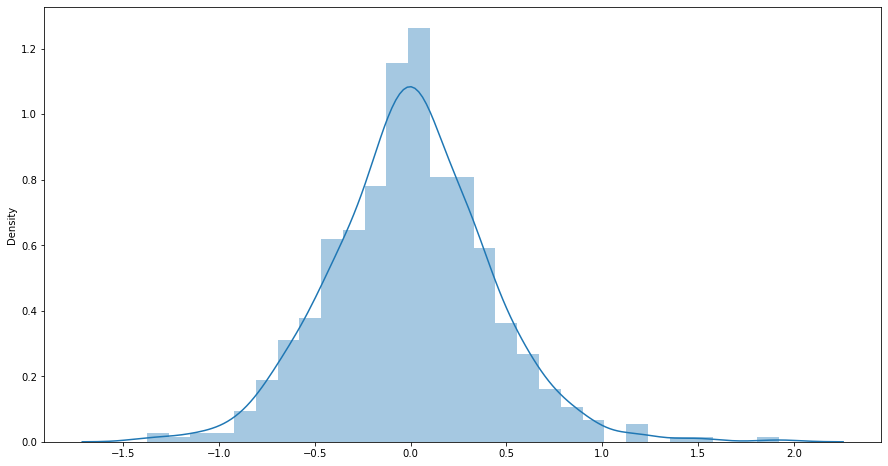

In [32]:
# type your code here
sns.distplot(model.resid)# The residuals obtained form the model are normally distributed.

<a id="ml_perf"> </a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Consider the full model. Calculate the mean square error and the root mean square error.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
from sklearn.metrics import r2_score, mean_squared_error

print("MSE Score", mean_squared_error(ytest, model.predict(xtest)))
print("RMSE Score", np.sqrt(mean_squared_error(ytest, model.predict(xtest))))

MSE Score 0.1594541221429759
RMSE Score 0.3993170696864534


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Calculate the mean absolute error and the  mean absolute percentage error. Compare the values of RMSE and MAE. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAE Score", np.abs(mean_absolute_error(ytest, model.predict(xtest))))
print("MAPE Score",MAPE(ytest, model.predict(xtest)))
#print("MAPE Score", np.abs(mean_absolute_percentage_error(ytest, model.predict(xtest))))

MAE Score 0.3017327712265983
MAPE Score 12.04869550103602


RMSE > MAE, then there is variation in the errors. This is true too, the RMSE-MAE difference isn't large enough to indicate the presence of very large errors.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Consider the full model, has the model overfitted? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
#Splitting the data in train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 1)

# defining the model
lr = LinearRegression()

pred_train = lr.fit(xtrain, ytrain).predict(xtrain) # prediction on Train
pred_test = lr.fit(xtest, ytest).predict(xtest) # prediction on Test


print('Train RMSE =',np.sqrt(mean_squared_error(ytrain,pred_train)))
print('Test RMSE =',np.sqrt(mean_squared_error(ytest,pred_test)))

Train RMSE = 0.4130518415716659
Test RMSE = 0.3926142907498538


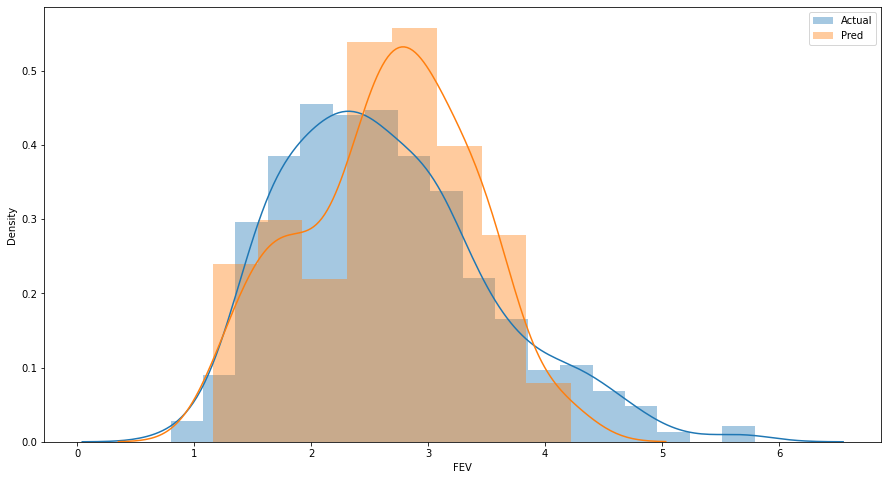

In [36]:
sns.distplot(ytrain, label = "Actual")
sns.distplot(pred_test, label = "Pred")
plt.legend()
plt.show()

#### Whether the Model is Overfitting?

#lrmodel.predict(unknownset) # ytest value is not there...

##### If the error in test<error in training, model is really doing well. 
#### Note: The errors should be close.
#### If the Test Error > Train Error => Bad performance. 
#### It means that whatever machine learnt using training data is not good and therefore,
#### there are errors. It simply signifies Underfitting of the Model.

# Conc: Model is not Overfitting